# comprehensive data exploration with PYTHON

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook

# The most difficult thing in life is to know yourself - Thales of Miletus

Fact1: Analysing data is more time consuming

    
Fact2: After collecting the data, follow the steps given below
    
    1. Understand the problem: We will look at each variable and do a philosophical analysis about their meaning and importance for this problem.
    
    2. Univariable Study: We will just focus on the dependent variable and try to know a little bit more about it
    
    3. Multivariate Study: We will try to understand how the dependent variable and independent variables relate
    
    4. Basic Clearning: We will clean the dataset and handle the missing data, outliers and Categorical varibles
    
    5. Test Assumptions: We will check if our data meets the assumption required by most multivariable techniques.

In [1]:
import pandas as pd
# Python is good for data munging and preparation. 
# Pandas helps to carryout the data analysis and modelling

import numpy as np
#  numpy is for scientific computing. It contains N-dimentional array object, linear algebra, 
#            fourier transform, random number capabilities

import matplotlib.pyplot as plt
#  matplotlib is a python 2d plotting library
# pyplot module provides matlab-like interface such as plot properties

import seaborn as sns
# seaborn is a python data visualization library based on matplotlib.
# It provides high-level interface for drawing attractive and informative statistical graphics

from scipy.stats import norm
# SciPy is python based ecosystem of open-source software for maths, science, & engineering.
# It provides user friendly numerical integration, interpolation, linear algebra and statistics.
# scipy.stats contains a large number of probability distribution as well as library of statistical function
# scipy.stats.norm - A normal continous random variable

from sklearn.preprocessing import StandardScaler
# sklearn (scikit-learn) is a simple data mining and data analysis tool built on NumPy, SciPy and matplotlib
# sklearn.preprocessing.StandardScalar - It standardize features by removing the mean and scaling to unit variance

from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# load the train file

df_train=pd.read_csv('train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### In order to understand the data, we can look at each variable and try to understand their meaning and relevance to the problem (It is time consuming, but it will give us a flavour of our dataset)

# 1. In order have some discipline in our analysis, we can create an Excel spreadsheet with the following columns

### 1. Variable - Variable name

### 2. Type       - Identification of variables type. There are two types of variables: numerical and categorical

### 3. Segment - Identification of variables segment. We can define three possible segments: building (related to physical characterstics), space (size) or location (neighbourhood)

### 4. Expectation - Our expectation about the variable influence in SalePrice. We can use categorical scale with high medium and low as possible values

### 5. Conclusion - our conclusion about the importance of the variable, after we give a quick look at the data. 

### 6. Comments - Any general comments that occured to us


### while 'Type' and 'Segment' is just for possible future refence, the column 'Expectation' is important because it helps us to develop sixth sense. To fil this column, we should read the description of all the variables and one by one ask ourselves:

### 1. Do you think this variable when we buy house?
### 2. How important ithe variable is?
### 3. Is this information already described in any other variable?

# Exausting.................


### After completing the spreadsheet, we can filter and look carefully the variables with High expectation. Then we can plot those variables with SalePrice. Then fill the Conclusion column which just correction of the expectations.

### In this dataset, the following variables play an important role

#### 1. OverallQual
#### 2. YearBuilt
#### 3. TotalBsmtSF
#### 4. GrLivArea



### To know all the important data, have to go through one by one and plot with respect to SalePrice.

# 2. First things is first: Analysing the target 'SalePrice'

'SalePrice' is the reason of our quest. It's like when we're going to a party. We always have a reason to be there. Usually, women are that reason. (disclaimer: adapt it to men, dancing or alcohol, according to your preferences)

Using the women analogy, let's build a little story, the story of 'How we met 'SalePrice''.

Everything started in our Kaggle party, when we were looking for a dance partner. After a while searching in the dance floor, we saw a girl, near the bar, using dance shoes. That's a sign that she's there to dance. We spend much time doing predictive modelling and participating in analytics competitions, so talking with girls is not one of our super powers. Even so, we gave it a try:

'Hi, I'm Kaggly! And you? 'SalePrice'? What a beautiful name! You know 'SalePrice', could you give me some data about you? I just developed a model to calculate the probability of a successful relationship between two people. I'd like to apply it to us!'

In [4]:
# description statistics summary

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

'Very well... It seems that your minimum price is larger than zero. Excellent! You don't have one of those personal traits that would destroy my model! Do you have any picture that you can send me? I don't know... like, you in the beach... or maybe a selfie in the gym?'

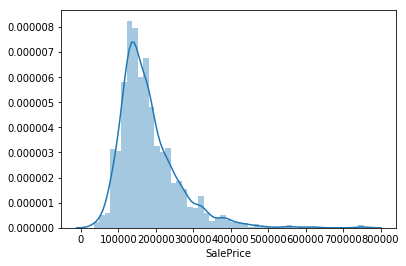

In [5]:
# histogram
sns.distplot(df_train['SalePrice']);

'Ah! I see you that you use seaborn makeup when you're going out... That's so elegant! I also see that you:

### Deviate from the normal distribution

### Have appreciable positive skewness

### show peakedness


This is getting interesting! 'SalePrice', could you give me your body measures?'


In [6]:
# skewness and kurtosis

print('Skewness: %f' % df_train['SalePrice'].skew())
print('Kurtosis: %f' % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Normal distribution: 
#### The data distribution is equal in the both sides from the central value.
#### (The data is distributed equally from the central value)
#### It is also known as bell curve

### Positive skew: (<0.5 - symmetry, >0.5 and <1 is little skewed and >1 is more skewed)
#### If the distribution tail is on the right side, it is positive skew distribution.
#### If the distribution tail is on the left side, it is negative skew distribution.

### Kurtosis:
#### If the distribution is curve is pointy, then it will have + value
#### If the distribution is curve is flat, then it will have - value


'SalePrice', her buddies and her interests
It is military wisdom to choose the terrain where you will fight. As soon as 'SalePrice' walked away, we went to Facebook. Yes, now this is getting serious. Notice that this is not stalking. It's just an intense research of an individual, if you know what I mean.

According to her profile, we have some common friends. Besides Chuck Norris, we both know 'GrLivArea' and 'TotalBsmtSF'. Moreover, we also have common interests such as 'OverallQual' and 'YearBuilt'. This looks promising!

To take the most out of our research, we will start by looking carefully at the profiles of our common friends and later we will focus on our common interests.

In [7]:
# Relationship with numerical variables

# Scatter plot grlivarea/saleprice

var= 'GrLivArea'
df_train[var].head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

In [8]:
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

data.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


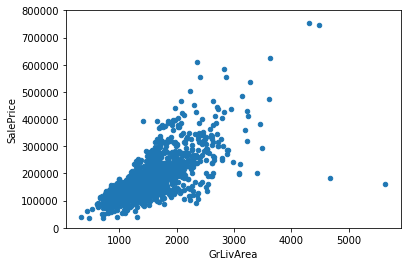

In [9]:
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Hmmm... It seems that 'SalePrice' and 'GrLivArea' are really old friends, with a linear relationship.

And what about 'TotalBsmtSF'?

In [10]:
var = 'TotalBsmtSF'

data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.head()

,SalePrice,TotalBsmtSF
0,208500,856
1,181500,1262
2,223500,920
3,140000,756
4,250000,1145


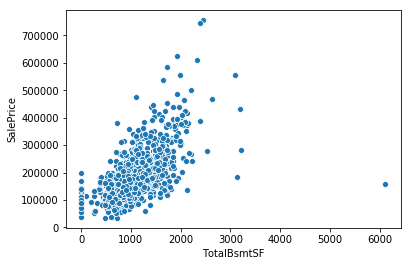

In [11]:
sns.scatterplot(x=var, y='SalePrice', data=df_train);

'TotalBsmtSF' is also a great friend of 'SalePrice' but this seems a much more emotional relationship! Everything is ok and suddenly, in a strong linear (exponential?) reaction, everything changes. Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.

### Relationship with Categorical features

In [12]:
var='OverallQual'

data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.head()

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8


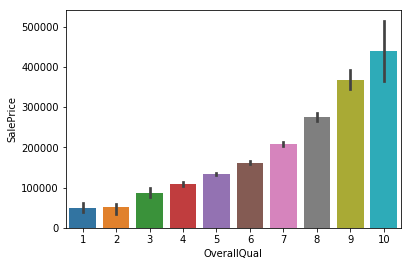

In [13]:
sns.barplot(x=var, y='SalePrice', data=df_train);

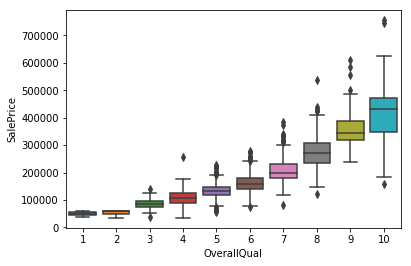

In [14]:
sns.boxplot(x=var, y='SalePrice', data=df_train);

Like all the pretty girls, 'SalePrice' enjoys 'OverallQual'. Note to self: consider whether McDonald's is suitable for the first date.

In [15]:
var='YearBuilt'

data=pd.concat([df_train[var], df_train['SalePrice']])
data.head()

0    2003
1    1976
2    2001
3    1915
4    2000
dtype: int64

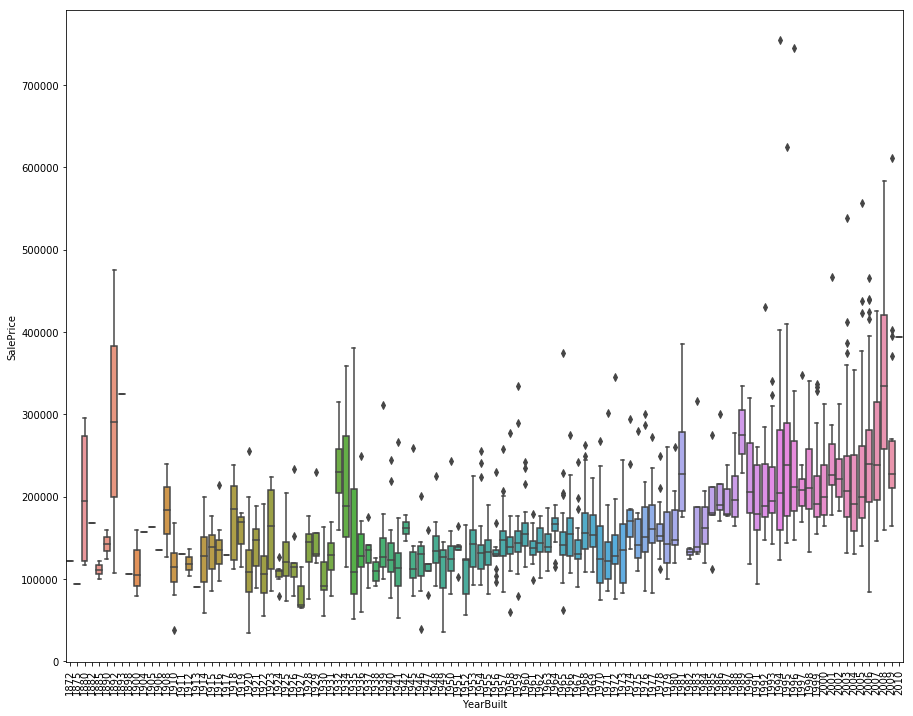

In [16]:
fig, ax = plt.subplots(figsize=(15,12))
sns.boxplot(x=var, y='SalePrice', data=df_train);
plt.xticks(rotation=90);

Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.

Note: we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

# 3. Keep calm and work smart

Until now we just followed our intuition and analysed the variables we thought were important. In spite of our efforts to give an objective character to our analysis, we must say that our starting point was subjective.

As an engineer, I don't feel comfortable with this approach. All my education was about developing a disciplined mind, able to withstand the winds of subjectivity. There's a reason for that. Try to be subjective in structural engineering and you will see physics making things fall down. It can hurt.

So, let's overcome inertia and do a more objective analysis.

## Plasma soup

'In the very beginning there was nothing except for a plasma soup. What is known of these brief moments in time, at the start of our study of cosmology, is largely conjectural. However, science has devised some sketch of what probably happened, based on what is known about the universe today.' (source: http://umich.edu/~gs265/bigbang.htm)

To explore the universe, we will start with some practical recipes to make sense of our 'plasma soup':



### .Correlation matrix (heatmap style)
### .'SalePrice' correlation matrix (zoomed heatmap style)
### .Scatter plots between the most correlated variables 

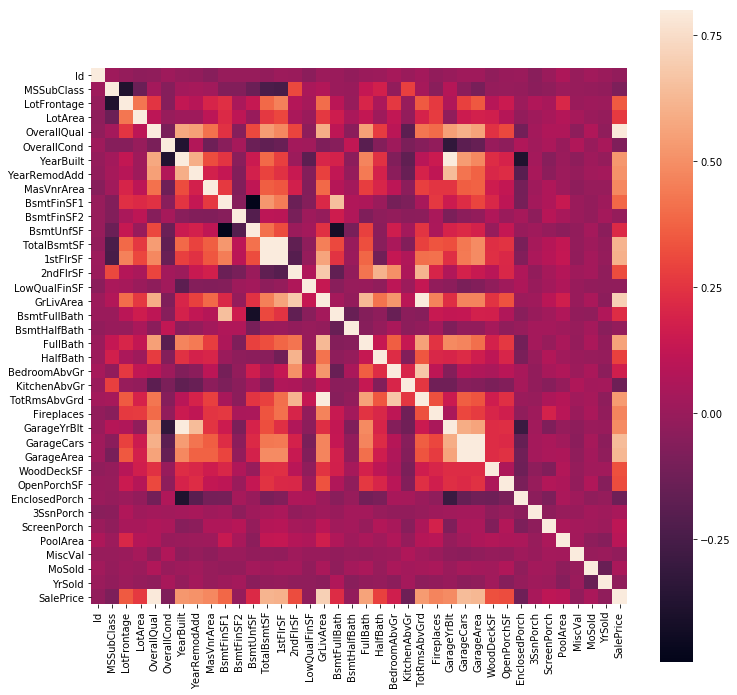

In [17]:
### Corelation matrix (heatmap style)

corrmat = df_train.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, vmax=0.8, square=True);

In my opinion, this heatmap is the best way to get a quick overview of our 'plasma soup' and its relationships. (Thank you @seaborn!)


In my opinion, this heatmap is the best way to get a quick overview of our 'plasma soup' and its relationships. (Thank you @seaborn!)

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

### SalePrice correlation matrix

In [18]:
k=10 #number of variables for heatmap
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

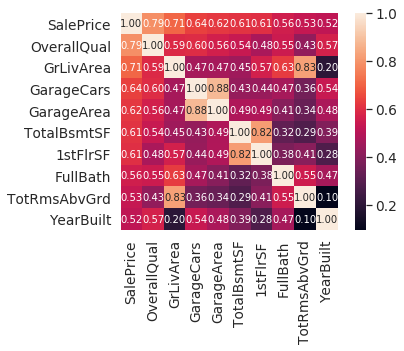

In [19]:
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to our crystal bass, these are the variables most correlated with 'SalePrice'. Thoughts on this:
    1. OverallQual, GrLivArea and TotalBsmtSF are strongly correlated with SalePrice.
    2. GarageCars and CarageArea are also some of the most strongly correlated variables. The number of cars that fit into the garage is a consequence of the garage area. So both like twin brothers. You can't distinguish them. So we need one of the variables in our analysis. So we keep Garacards since its correlation with Saleprice is higher.
    3. TotalBsmtSF and 1stFlrSf is twin sisters. we can keep TotalBmst.....
    4. FullBath.......
    5. TotalRmsAbvGrd and GrLivArea twin brothers
    6. YearBuilt is slightly correlated with SalePrice.
    
    
Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. 


### Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

Get ready for what you're about to see. I must confess that the first time I saw these scatter plots I was totally blown away! So much information in so short space... It's just amazing. Once more, thank you @seaborn! You make me 'move like Jagger'!

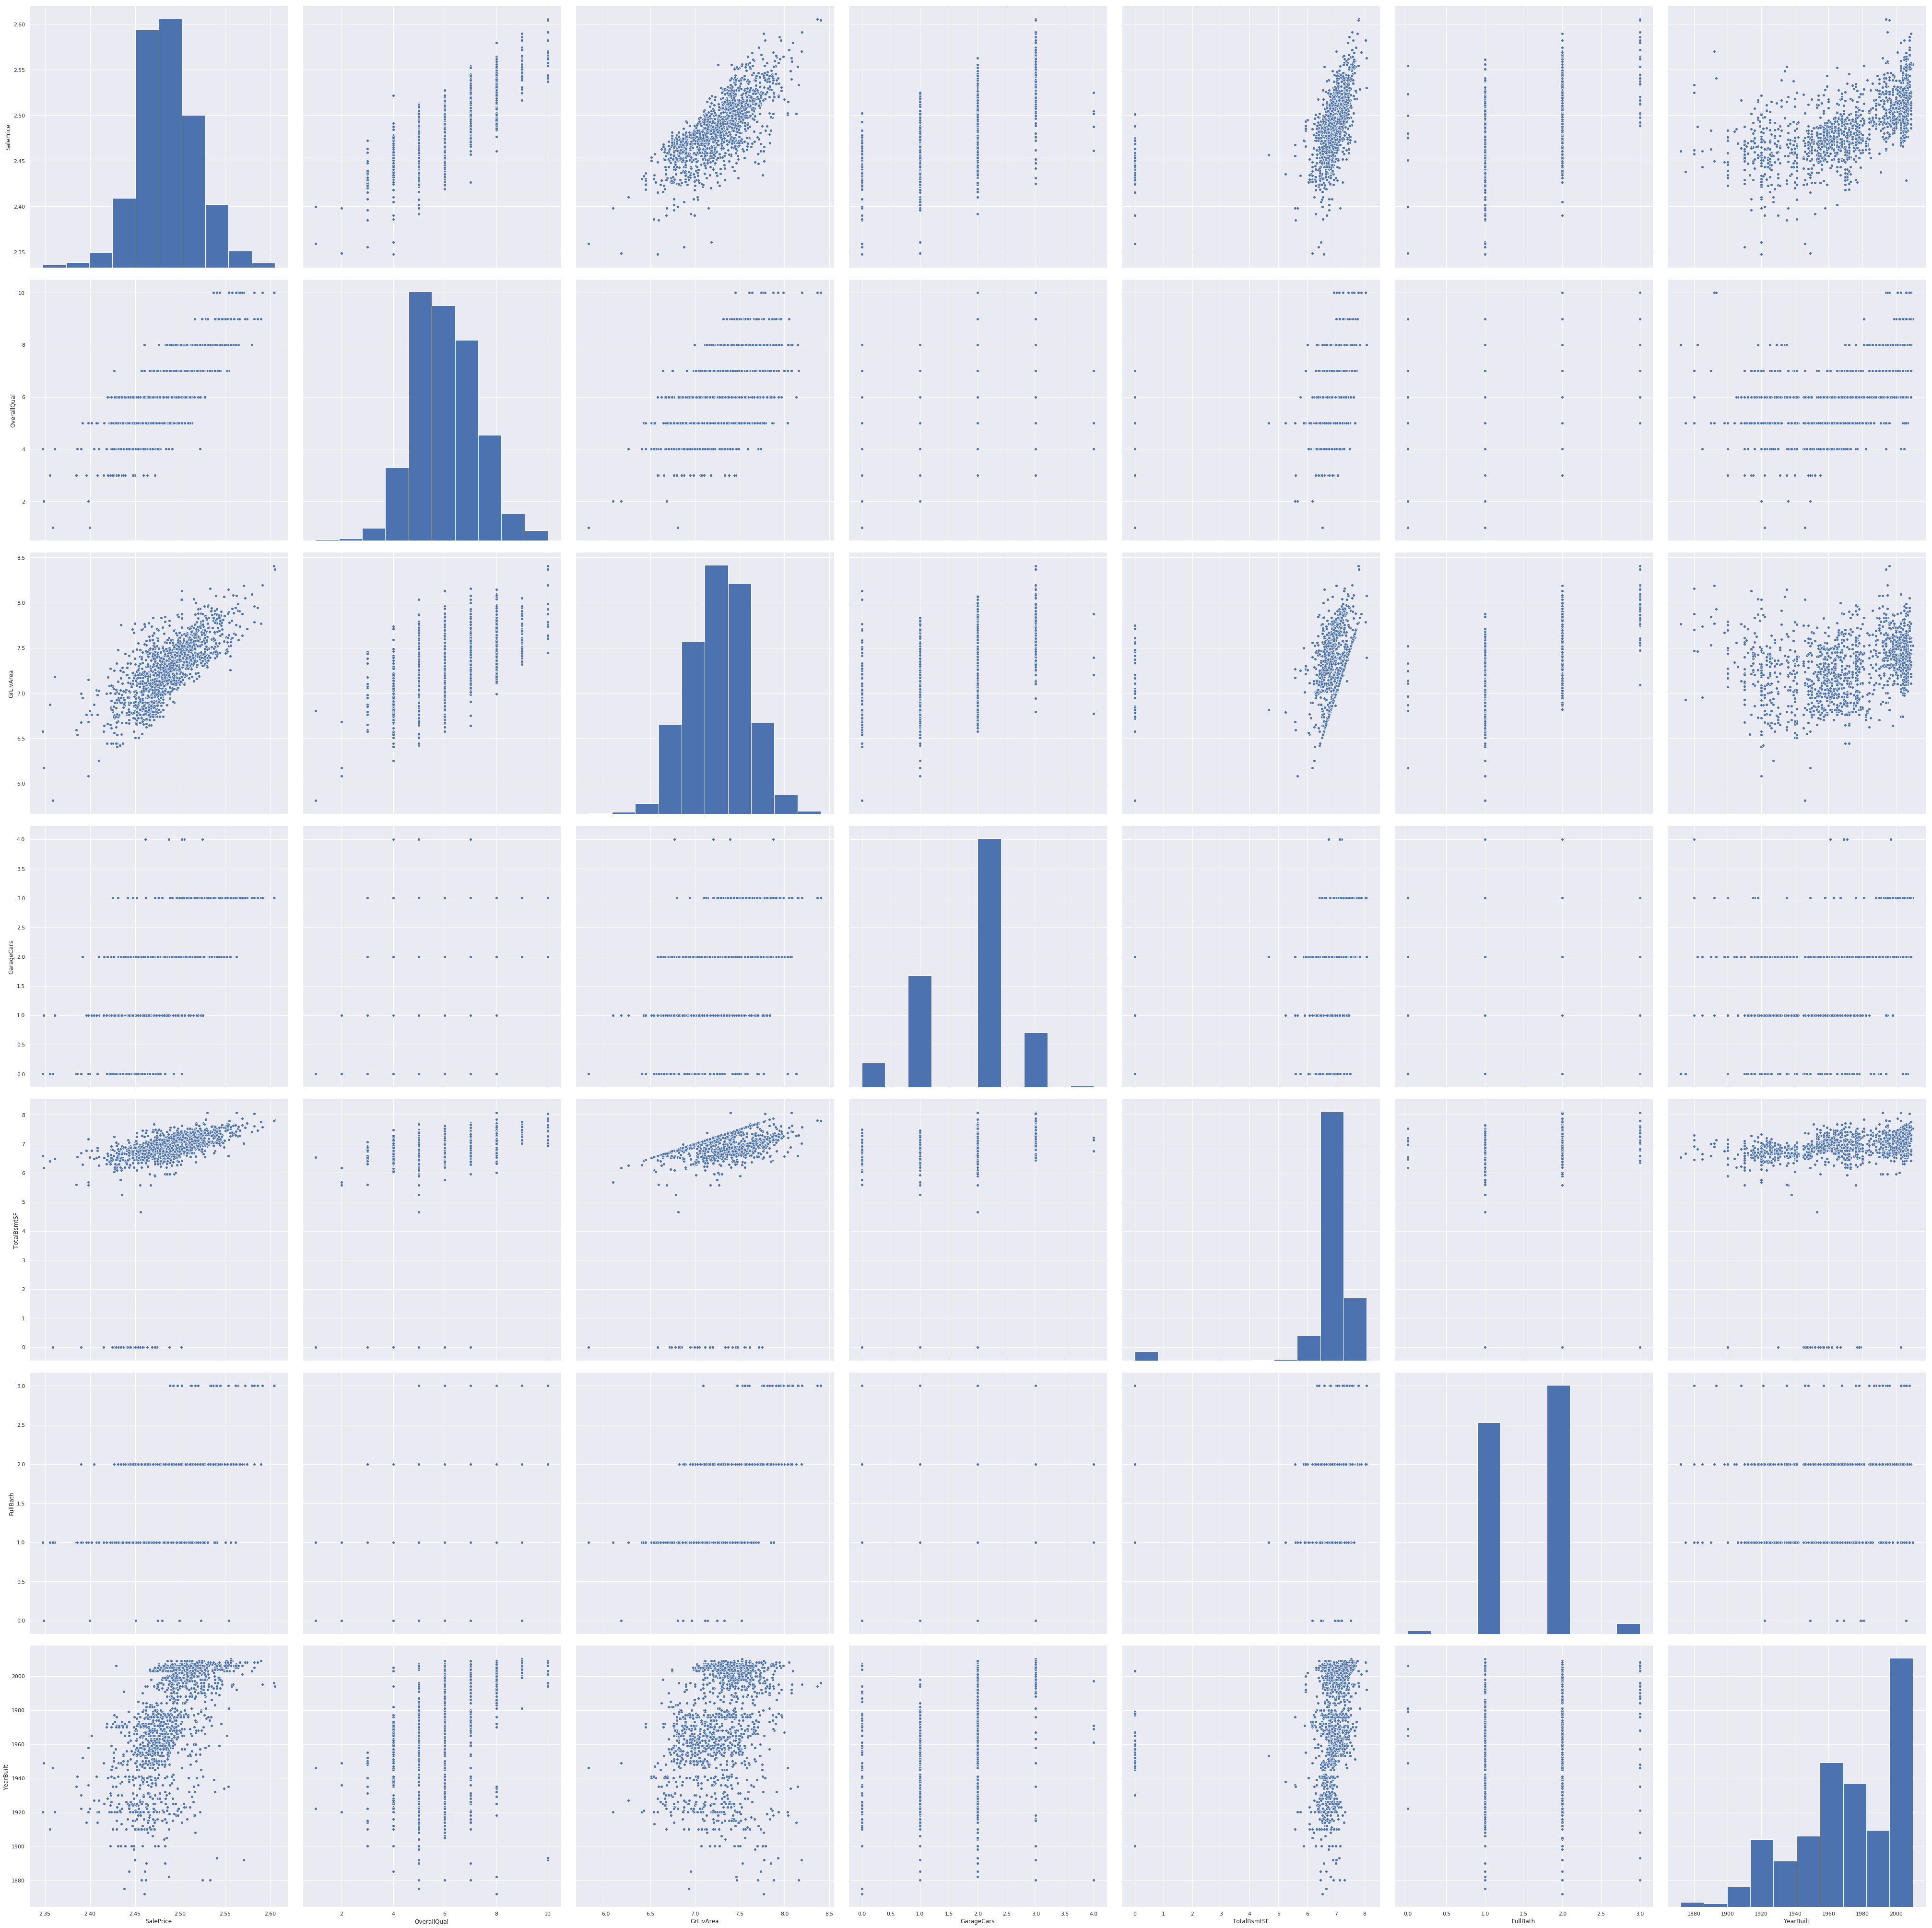

In [50]:
sns.set()
cols=['SalePrice','OverallQual', 'GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[cols], size=8)
plt.show()

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

Ok, enough of Rorschach test for now. Let's move forward to what's missing: missing data!

# 4. Missing Data

Important questions when thinking about missing data

1. How prevalent is the missing data?
2. Is missing data random or does it have pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [21]:
total =  df_train.isnull().sum().sort_values(ascending=False)



In [22]:
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.



Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.



Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

### What I learned

Before analysing 
1. Look at the data
2. Make an spreadsheet with variable, Type, Segment, Expectation(l,m,h), Conclusion, comment
3. Look at the h-expectation variable and try to understand more by analysing and visualizing it
4. Think each variable which is important and contributes to the target

Analysing
1. describe target, plot target
2. univariate vs target
3. multivariate vs target
4. correlation matrix corr(), heatmap
5. corrcoef(), heatmap
6. pairplot()
By this time you understand the problem, important variable, relation between variable and target.

Next you can go for data cleaning (missing data, outliers and Categorical varibles)

# 4. Missing Data

### important question when thinking about missing data

1. How prevalent is the missing data
2. Is the missing data random or does it have pattern?

The answer the these question is important for practical reasons because missing data can imply reduction of sample size. This can prevent us from proceeding the analysis.
Moreover, from substantive prespective, we need to ensure that the missing data is not biased and hidding an inconvenient truth.

In [23]:
df_train.shape[0]

1460

In [24]:
# missing data

total_missing_count=df_train.isnull().sum().sort_values(ascending=False)

percent_missing = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total_missing_count, percent_missing], axis=1, keys=['Total','percent'])
missing_data.head()

,Total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


In [25]:
# missing data

total_missing_count=df_train.isnull().sum().sort_values(ascending=False)

percent_missing_1 = (df_train.isnull().sum()/df_train.shape[0]).sort_values(ascending=False)

missing_data = pd.concat([total_missing_count, percent_missing_1], axis=1, keys=['Total','percent'])
missing_data.head(20)

,Total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.



In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 in5  problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.

In [26]:
df_train = df_train.drop((missing_data[missing_data['Total']>1]).index,1)

df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

df_train.isnull().sum().max()

0

## Out liars!

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

### Univeriate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [27]:
# standardizing data

saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);

low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]

high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer ranger (low) of the distribution')
print(low_range)
print('outer ranger (high) of the distribution')
print(high_range)

outer ranger (low) of the distribution
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
outer ranger (high) of the distribution
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


Low range values are similar and not too far from zero

Hight range values are far from 0 and the above 7 values are really out of range

For now, we will not consider any of these values as an outliers but we should be careful with those two 7 values


### Bivariate analysis

We already know the following scatter plots by heart. However, when we looks to things from new perspective, there's always something to discover. As Alan Kay aisd, ' a change in perspective is worth 80 IQ points'

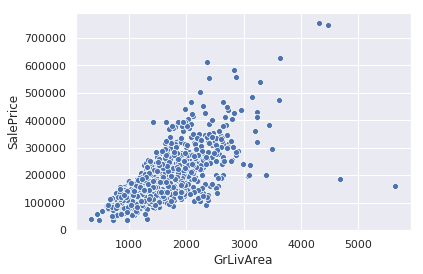

In [28]:
var = 'GrLivArea'

data= pd.concat([df_train[var], df_train['SalePrice']], axis=1)
sns.scatterplot(x=var, y='SalePrice', data=data)



What has been revealed:

    The two values with bigger GivLivArea seem strange and they are not following the crowd. We can speculate why this is happening. May be they refere to agricultural area and that could explain the low price. I am not sure about this but I am quite confident that these two points are not representative of the typical case. Therefore we'll define them as outliers and delete them.
    
    .The two observations in the top of the plot are above 7 that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.
    

In [29]:
# deleting the points
df_train.sort_values(by='GrLivArea', ascending = False).head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
1169,1170,60,RL,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,625000


In [30]:
df_train =  df_train.drop(df_train[df_train['Id'] == 1299].index)

df_train =  df_train.drop(df_train[df_train['Id'] ==  524].index)

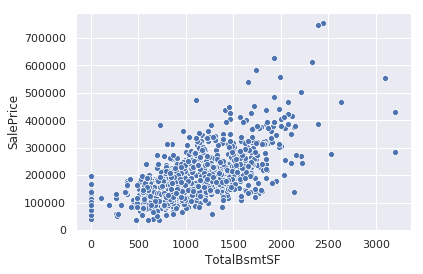

In [31]:
# bivariate analysis saleprice/grliveareaabs

var = 'TotalBsmtSF'

data = pd.concat([df_train[var],df_train['SalePrice']], axis=1)
sns.scatterplot(x=var, y='SalePrice', data=data)

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

# 5. Getting Hard Core

In Ayn Rand's Novel, 'Atlas Shrugged', there is an ofter-repeated question: who is John Galt? A big part of the book is about the quest to discover the answer to this question.

I feel Randian now. Who is 'SalePrice?'

The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and dicovered a lot about SalePrice. Now it time to go deep and understand how saleprice comples with the statistical assumption that enables us to apply multivariate techniques.

According to Hair et al(2013), four assumption should be tested:
https://www.amazon.com/Multivariate-Data-Analysis-Joseph-Hair/dp/9332536503/ref=as_sl_pc_tf_til?tag=pmarcelino-20&linkCode=w00&linkId=5e9109fa2213fef911dae80731a07a17&creativeASIN=9332536503

### 1. Normality 
When we talk about normality what we mean is that the data should look like a normal distribution. 
This is important because several statistic test rely on this (eg: t-statistics).
In this exercise we'll just check univariate normality for SalePrice (which is limited approach).
Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps.
Another detail to take into account is that in big samples (> 200 observations) normality is not such an issue.
However, if we solve normality, we avoid a lot of other problems (eg. heteroscedacity) so that's the main reason why we are doing this analysis.

### 2. Homoscedacity
I just hope I wrote it right. Homoscendasticity refers to the assumption that dependent variables exhibit equal level of variance across the range of predictor variables.
Homoscedasticity is desirable because  we want the error term to be the same across all the values of the independent variables.

### 3. Linearity
The most common way to assess linearity is to examine scatter plots and search for linear patterns.
If the pattern is not linear, it would be worthwhile to explore the data transformations. 
However, we willn't get into this because most of the scatter plots we have seen appear to have linear relationship.

### 4. Absence of the correlated errors
Correlated errors, like the definition suggests, happen when one error is correlated to another. 
For instance, if one positive error make a negative error systematically, it means that there's a relationship between these variables.
This occurs often in time series, where some patterns are time related.
We will also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. Thats the most common solution for correlated errors.

## In the search of normality

The point here is to test 'SalePrice in a very lean way'. We will do this paying attention to:
    
    1. Histogram - Kurtosis and skewness
    2. Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution

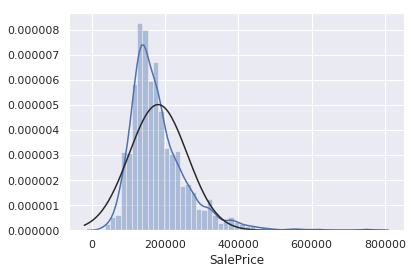

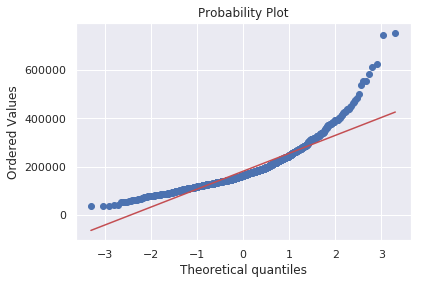

In [32]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig=plt.figure()
rest=stats.probplot(df_train['SalePrice'], plot=plt)

Ok, SalePrice is not normal. It shows peakedness, positive skewness and not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformation usually works well. When I discovered this, I felt like an Hogwarts student discovering a new cool spell.

In [35]:
# applying log transformation
df_train['SalePrice']=np.log(df_train['SalePrice'])

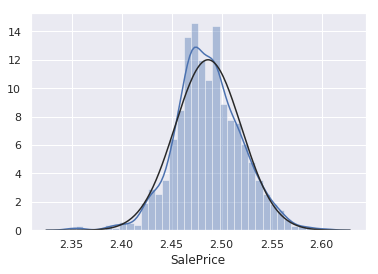

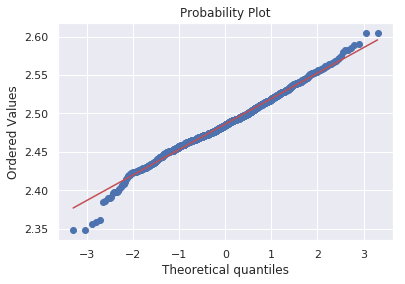

In [36]:
# transformed histogram and normal porbability plot

sns.distplot(df_train['SalePrice'], fit=norm)

fig = plt.figure()

rest =  stats.probplot(df_train['SalePrice'], plot=plt)

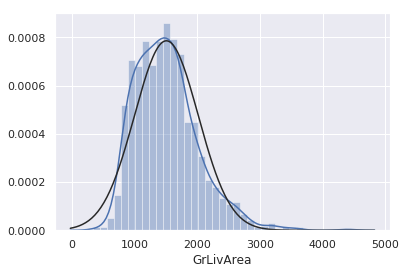

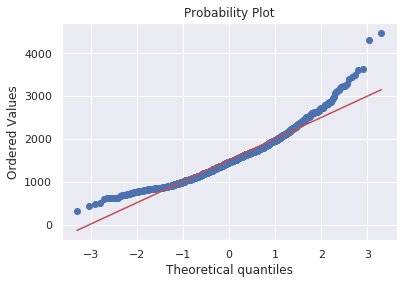

In [37]:
# histogram and normal probability plot

sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [38]:
# data transformation

df_train['GrLivArea']=np.log(df_train['GrLivArea'])


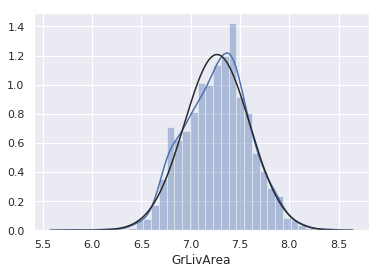

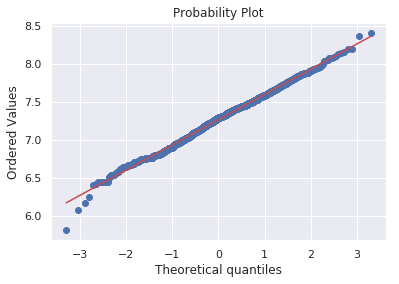

In [39]:
sns.distplot(df_train['GrLivArea'], fit=norm)

fig = plt.figure()

res = stats.probplot(df_train['GrLivArea'], plot=plt)

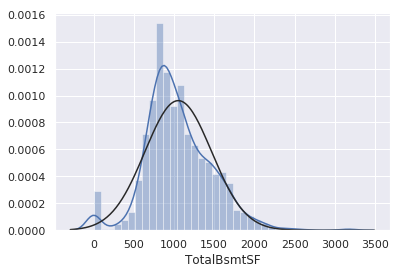

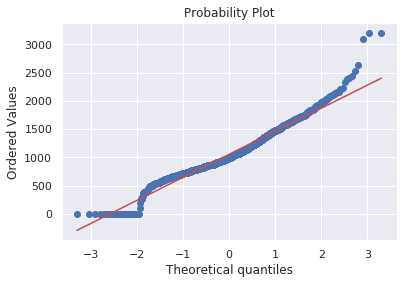

In [40]:
# histogram and normal probability plot

sns.distplot(df_train['TotalBsmtSF'], fit=norm)

fig = plt.figure()

res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

Ok, now we are dealing with the big boss. What do we do here?

. something that, in general, presents skewness

. A significant number of observations with zero (houses without basement)

. A big problem because the value zero doesn't allow us to do log transformation

To apply a log transformation here, we will create a variable that can get the effect of having or not having basement(binary variable).
Then we will do a log transformation to all the non-zero observations, ignoring those with value zero.
This way we can transform data, without losing the effect of having or not basement.

I am not sure if this approach is correct. It just seemed right to me. That what I call 'High risk Engineering'

In [46]:
# create a column for new variable (one is enough because it's a binary categorical feature)

# if area is >0, for area == 0 it gets 0

df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
# df_train['HasBsmt'].shape
# df_train['HasBsmt'] = 0
# print(df_train['HasBsmt'])

df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt']=1

In [47]:
# transform data

df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] =  np.log(df_train['TotalBsmtSF'])

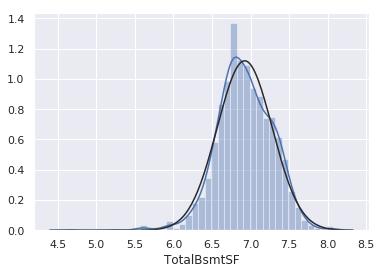

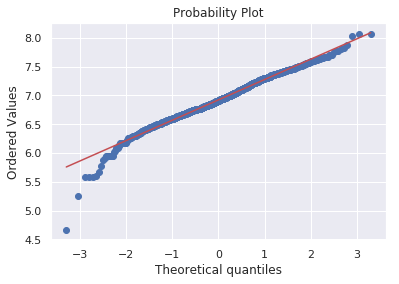

In [48]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res=stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### In the search for writing 'homoscedasticity' right at the first attempt

The best approach to test homoscedasticity for two metric variables is graphically.
Departures form an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the centre of the distribution)

starting by 'SalePrice' and 'GrLivArea'

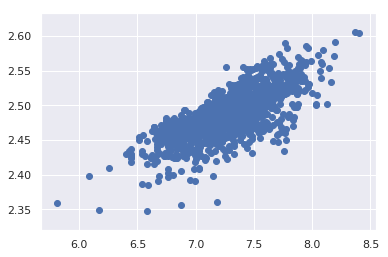

In [49]:
# scatter plot


plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.



Now lets check 'Saleprice' and 'TotalBsmtSF'

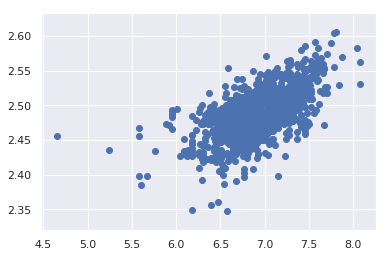

In [52]:
#scatter plot

plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

# Last but not the least, dummy variables

Easy mode

In [57]:
# convert categorical variable into dummy

df_train = pd.get_dummies(df_train)

In [59]:
df_train.head()
df_train.shape

(1457, 222)

# conclusion

We reached the end of our exercise.

Throughout this kernel we put in practice many of the strategies proposed by Hair et al (2013). We philosophied about the variables, we analysed 'SalePrice' alone and with the most correlated variables, we dealth with missing data and outliers, we tested the fundamental statistical assumptions and we even transformed categorical variables into dummy variables. Thats a lof of work that Python helped us make easier.

But the quest is not over. Remeber that our story stopped in the Facebook research. Now it time to give a call to 'SalePrice' and invite her to dinner. Try to predict her behaviour. Do you think she's a girl that enjoys regularized linear regression approaches? or do you think she prefers ensemble methods? or may be something else?

It's up to you to find out.